# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.38264300759
rmse median 0.467377359505


In [4]:
Estimate1(iters=10000)

Experiment 1
rmse xbar 0.378479027294
rmse median 0.457579536071


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.143814266093
mean error unbiased -0.00111664377474


In [9]:
Estimate2(iters=100000)

mean error biased -0.144131746334
mean error unbiased -0.00148703738964


In [8]:
-1/7 # Error is biased by -1/n

-0.14285714285714285

The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [10]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

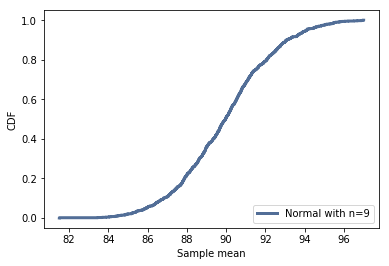

In [19]:
cdf = thinkstats2.Cdf(xbars, label='Normal with n=9')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF', loc='lower right')

The mean of the sample means is close to the actual value of $\mu$.

In [20]:
np.mean(xbars)

89.960988431723678

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [21]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.939173377573027, 94.09860589256462)

And the RMSE of the sample means is called the standard error.

In [22]:
stderr = RMSE(xbars, 90)
stderr

2.4417720880646239

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [23]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.05068024687
rmse Lm 2.0633437695
mean error L 0.332230283355
mean error Lm 0.509465887313


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [37]:
def SimulateSample2(mu=90, sigma=7.5, n=9, iters=1000, func=np.mean, *args, **kwargs):
    xbars = np.empty(iters)
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = func(xs, *args, **kwargs)
        xbars[j] = xbar
    return xbars

In [42]:
xbars   = SimulateSample2(mu=0, sigma=1, n=7, iters=100000)
medians = SimulateSample2(mu=0, sigma=1, n=7, iters=100000, func=np.median)

In [45]:
print(f'RMSE mean : {RMSE(xbars, 0)}')
print(f'RMSE median : {RMSE(medians, 0)}')
print(f'Mean error mean : {MeanError(xbars, 0)}')
print(f'Mean error median : {MeanError(medians, 0)}')

RMSE mean : 0.3784389873989377
RMSE median : 0.45836998874235235
Mean error mean : -0.0006193790208548164
Mean error median : -0.00016696932940595064


In [46]:
var_biased   = SimulateSample2(mu=0, sigma=1, n=7, iters=100000, func=np.var)
var_unbiased = SimulateSample2(mu=0, sigma=1, n=7, iters=100000, func=np.var, ddof=1)

In [48]:
print(f'RMSE var biases : {RMSE(var_biased, 1**2)}')
print(f'RMSE var unbiased : {RMSE(var_unbiased, 1**2)}')
print(f'Mean error var biased : {MeanError(var_biased, 1**2)}')
print(f'Mean error var unbiased : {MeanError(var_unbiased, 1**2)}')

RMSE var biases : 0.5163378379090466
RMSE var unbiased : 0.5753630532190974
Mean error var biased : -0.14230227874192414
Mean error var unbiased : 0.0008594960363089353


**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [49]:
def SimulateExponential(lam=2, n=10, iters=1000, func=np.mean, *args, **kwargs):
    L = np.empty(iters)
    for i in range(iters):
        measure = np.random.exponential(1 / lam, n)
        L[i] = 1 / func(measure, *args, **kwargs)
    return L

In [52]:
experiment = SimulateExponential()

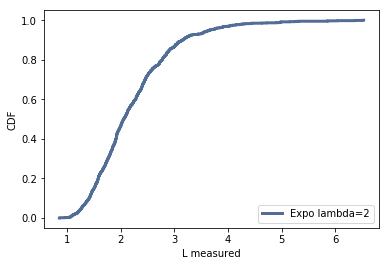

In [53]:
thinkplot.Cdf(thinkstats2.Cdf(experiment, label='Expo lambda=2'))
thinkplot.Config(xlabel='L measured', ylabel='CDF')

In [55]:
std_error = RMSE(experiment, 2)
print(std_error)

0.804839317387


In [58]:
lower, upper = np.percentile(experiment, [5, 95])
print(f'Lower: {lower}, Upper: {upper}')

Lower: 1.2764572454621366, Upper: 3.656439126951717


In [64]:
for n in [5, 10, 15, 20, 50, 100]:
    experiment = SimulateExponential(n=n)
    std_error = RMSE(experiment, 2)
    std_errors.append(std_error)

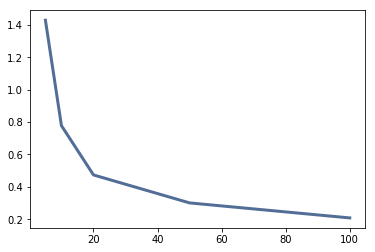

In [65]:
thinkplot.Plot([5, 10, 15, 20, 50, 100], std_errors)

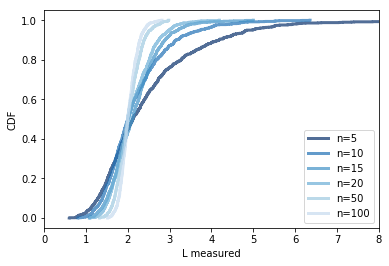

In [68]:
thinkplot.PrePlot(6)

for n in [5, 10, 15, 20, 50, 100]:
    experiment = SimulateExponential(n=n)
    thinkplot.Cdf(thinkstats2.Cdf(experiment, label=f'n={n}'))
thinkplot.Config(xlabel='L measured', ylabel='CDF', xlim=[0,8])

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [70]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [84]:
# Ligue 1 saison 2016-2017 : 2,6 buts par martch (http://www.lfp.fr/LFPStats/stats_home?competition=D1&saison=100&butsME=M)
def ManyGames(lam=2.6, iters=10000):
    games = [SimulateGame(lam) for _ in range(iters)]
    print(f'Mean error for {iters} simulations with lamba = {lam} = {MeanError(games, lam)}')
    print(f'RMSE for {iters} simulations with lambda = {lam} = {RMSE(games, lam)}')
    return games

In [85]:
ligue1 = ManyGames()

Mean error for 10000 simulations with lamba = 2.6 = 0.03720000000000001
RMSE for 10000 simulations with lambda = 2.6 = 1.6042319034354104


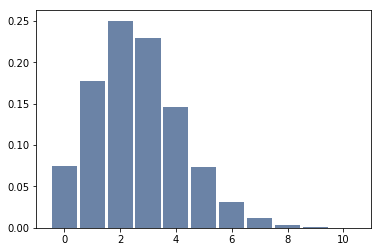

In [86]:
thinkplot.Hist(thinkstats2.Pmf(ligue1))